### Importing Libraries

In [2]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df =  pd.read_csv('smoking_health_data.csv')
df

,age,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol
0,54,male,yes,95,110/72,NaN,219.0
1,45,male,yes,64,121/72,NaN,248.0
2,58,male,yes,81,127.5/76,NaN,235.0
3,42,male,yes,90,122.5/80,NaN,225.0
4,42,male,yes,62,119/80,NaN,226.0
...,...,...,...,...,...,...,...
3895,37,male,yes,88,122.5/82.5,60.0,254.0
3896,49,male,yes,70,123/75,60.0,213.0
3897,56,male,yes,70,125/79,60.0,246.0
3898,50,male,yes,85,134/95,60.0,340.0


### Data Manipulation and Cleaning


In [4]:
df.isna().sum()

age                0
sex                0
current_smoker     0
heart_rate         0
blood_pressure     0
cigs_per_day      14
chol               7
dtype: int64

In [5]:
# Replacing Nan values with zero

df= df.fillna(0)

In [6]:
df.columns

Index(['age', 'sex', 'current_smoker', 'heart_rate', 'blood_pressure',
       'cigs_per_day', 'chol'],
      dtype='object')

In [7]:
df.dtypes

age                 int64
sex                object
current_smoker     object
heart_rate          int64
blood_pressure     object
cigs_per_day      float64
chol              float64
dtype: object

In [8]:
#Convert blood_pressure from object to float
try:
    df['blood_pressure'] = pd.to_numeric(df['blood_pressure'])
except ValueError:
     print(df)
   

      age   sex current_smoker  heart_rate blood_pressure  cigs_per_day   chol
0      54  male            yes          95         110/72           0.0  219.0
1      45  male            yes          64         121/72           0.0  248.0
2      58  male            yes          81       127.5/76           0.0  235.0
3      42  male            yes          90       122.5/80           0.0  225.0
4      42  male            yes          62         119/80           0.0  226.0
...   ...   ...            ...         ...            ...           ...    ...
3895   37  male            yes          88     122.5/82.5          60.0  254.0
3896   49  male            yes          70         123/75          60.0  213.0
3897   56  male            yes          70         125/79          60.0  246.0
3898   50  male            yes          85         134/95          60.0  340.0
3899   40  male            yes          98         132/86          70.0  210.0

[3900 rows x 7 columns]


In [9]:
# Rename the Columns
df =  df.rename(columns={'age': 'Age', 'sex': 'Gender', 'current_smoker':'Smoking Status', 'heart_rate':'Heart Rate', 'blood_pressure':'Blood Pressure',
       'cigs_per_day':'Cigs Per Day', 'chol':'Cholesterol'})


In [10]:
df.head(3)

,Age,Gender,Smoking Status,Heart Rate,Blood Pressure,Cigs Per Day,Cholesterol
0,54,male,yes,95,110/72,0.0,219.0
1,45,male,yes,64,121/72,0.0,248.0
2,58,male,yes,81,127.5/76,0.0,235.0


In [11]:
# Checking for duplicates in the dataframe
df.drop_duplicates()

,Age,Gender,Smoking Status,Heart Rate,Blood Pressure,Cigs Per Day,Cholesterol
0,54,male,yes,95,110/72,0.0,219.0
1,45,male,yes,64,121/72,0.0,248.0
2,58,male,yes,81,127.5/76,0.0,235.0
3,42,male,yes,90,122.5/80,0.0,225.0
4,42,male,yes,62,119/80,0.0,226.0
...,...,...,...,...,...,...,...
3895,37,male,yes,88,122.5/82.5,60.0,254.0
3896,49,male,yes,70,123/75,60.0,213.0
3897,56,male,yes,70,125/79,60.0,246.0
3898,50,male,yes,85,134/95,60.0,340.0


In [12]:
#Replacing YES with smoker and NO with non-smoker. 
df['Smoking Status'] = df['Smoking Status'].replace(['yes','no'],['smoker','non-smoker'])
#df['Smoking Status'] = df['Smoking Status'].map({'yes': 'smoker', 'no': 'non-smoker'})
df

,Age,Gender,Smoking Status,Heart Rate,Blood Pressure,Cigs Per Day,Cholesterol
0,54,male,smoker,95,110/72,0.0,219.0
1,45,male,smoker,64,121/72,0.0,248.0
2,58,male,smoker,81,127.5/76,0.0,235.0
3,42,male,smoker,90,122.5/80,0.0,225.0
4,42,male,smoker,62,119/80,0.0,226.0
...,...,...,...,...,...,...,...
3895,37,male,smoker,88,122.5/82.5,60.0,254.0
3896,49,male,smoker,70,123/75,60.0,213.0
3897,56,male,smoker,70,125/79,60.0,246.0
3898,50,male,smoker,85,134/95,60.0,340.0


### 1. Exploring smoking between gender.


In [13]:
df1 = df.groupby('Gender')['Smoking Status'].value_counts().reset_index(name='Total')
df1

,Gender,Smoking Status,Total
0,female,non-smoker,1254
1,female,smoker,827
2,male,smoker,1105
3,male,non-smoker,714


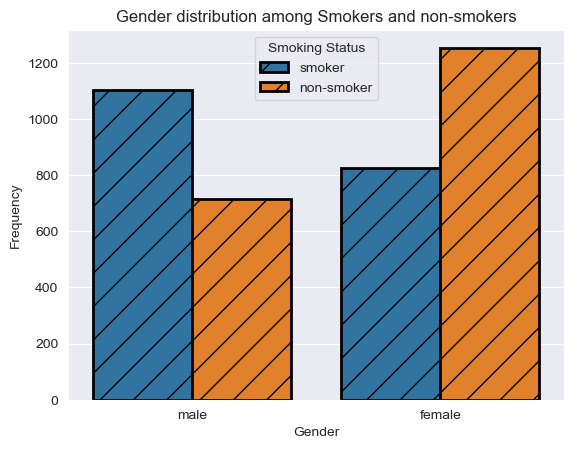

In [14]:
sns.set_style('darkgrid')
sns.countplot(x='Gender', hue='Smoking Status', data=df, lw=2, ec='black', hatch='/');
plt.title('Gender distribution among Smokers and non-smokers')
plt.ylabel('Frequency');

### 2. Creating age groups 

In [15]:
age_groups = df['Age'].unique()
age_groups
#len('age_groups')

array([54, 45, 58, 42, 57, 43, 37, 49, 55, 39, 53, 48, 46, 40, 56, 38, 65,
       41, 44, 36, 64, 68, 52, 60, 67, 35, 34, 51, 63, 62, 59, 61, 50, 66,
       47, 70, 69, 33, 32], dtype=int64)

In [16]:
df['Age Group'] = pd.cut(df.Age, bins=[30,40,50,60,70], labels=['31-40','41-50', '51-60', '61-70'])
df

,Age,Gender,Smoking Status,Heart Rate,Blood Pressure,Cigs Per Day,Cholesterol,Age Group
0,54,male,smoker,95,110/72,0.0,219.0,51-60
1,45,male,smoker,64,121/72,0.0,248.0,41-50
2,58,male,smoker,81,127.5/76,0.0,235.0,51-60
3,42,male,smoker,90,122.5/80,0.0,225.0,41-50
4,42,male,smoker,62,119/80,0.0,226.0,41-50
...,...,...,...,...,...,...,...,...
3895,37,male,smoker,88,122.5/82.5,60.0,254.0,31-40
3896,49,male,smoker,70,123/75,60.0,213.0,41-50
3897,56,male,smoker,70,125/79,60.0,246.0,51-60
3898,50,male,smoker,85,134/95,60.0,340.0,41-50


In [17]:
df2 = df.groupby('Age Group')['Smoking Status'].value_counts().reset_index(name='Counts') 
df2 = df2.pivot(index='Age Group', columns='Smoking Status', values='Counts')
df2

C:\Users\farou\AppData\Local\Temp\ipykernel_16840\3801411642.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2 = df.groupby('Age Group')['Smoking Status'].value_counts().reset_index(name='Counts')


Smoking Status,non-smoker,smoker
Age Group,,
31-40,273,417
41-50,626,865
51-60,695,491
61-70,374,159


C:\Users\farou\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


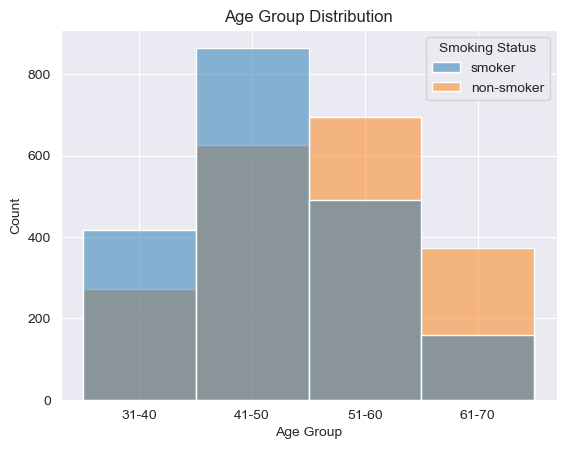

In [18]:
#sns.histplot(x='Age Group', hue='Smoking Status', data=df, stat='probability', fill=False, kde=True);
sns.histplot(x='Age Group', hue='Smoking Status', data=df)
plt.title('Age Group Distribution');

### 3. Effect of Smoking on Blood Pressure

In [21]:
df.sample(5)

,Age,Gender,Smoking Status,Heart Rate,Blood Pressure,Cigs Per Day,Cholesterol,Age Group
334,54,female,non-smoker,80,137/88,0.0,266.0,51-60
944,61,female,non-smoker,85,182/121,0.0,272.0,61-70
3632,47,male,smoker,66,111/70,30.0,260.0,41-50
544,48,male,non-smoker,75,144/96.5,0.0,245.0,41-50
701,63,male,non-smoker,80,130/81,0.0,233.0,61-70


In [23]:
df['Systolic'] = df['Blood Pressure'].str.split('/').str.get(0)
df['Diastolic'] = df['Blood Pressure'].str.split('/').str.get(1)

In [25]:
df['Systolic'] = df['Systolic'].astype(float)
df['Diastolic'] = df['Diastolic'].astype(float)

In [27]:
# Categorizing blood pressure

def categorize_BP(Systolic, Diastolic):
    if Systolic < 120 and Diastolic < 80:
        return "Normal"
    elif Systolic < 130 and Diastolic < 80:
        return "Elevated"
    elif Systolic <= 139 or Diastolic <= 89:
        return "Hypertension Stage 1"
    elif Systolic >= 140 or Diastolic >= 90:
        if Systolic > 180 or Diastolic > 120:
            return "Hypertensive Crisis"
        return "Hypertension Stage 2"
    else:
        return "Unclassified"


df['BP Category'] = df.apply(lambda row: categorize_BP(row['Systolic'], row['Diastolic']), axis=1)
df.sample(3)


,Age,Gender,Smoking Status,Heart Rate,Blood Pressure,Cigs Per Day,Cholesterol,Age Group,Systolic,Diastolic,BP Category
0,54,male,smoker,95,110/72,0.0,219.0,51-60,110.0,72.0,Normal
1,45,male,smoker,64,121/72,0.0,248.0,41-50,121.0,72.0,Elevated
2,58,male,smoker,81,127.5/76,0.0,235.0,51-60,127.5,76.0,Elevated
3,42,male,smoker,90,122.5/80,0.0,225.0,41-50,122.5,80.0,Hypertension Stage 1
4,42,male,smoker,62,119/80,0.0,226.0,41-50,119.0,80.0,Hypertension Stage 1
...,...,...,...,...,...,...,...,...,...,...,...
3895,37,male,smoker,88,122.5/82.5,60.0,254.0,31-40,122.5,82.5,Hypertension Stage 1
3896,49,male,smoker,70,123/75,60.0,213.0,41-50,123.0,75.0,Elevated
3897,56,male,smoker,70,125/79,60.0,246.0,51-60,125.0,79.0,Elevated
3898,50,male,smoker,85,134/95,60.0,340.0,41-50,134.0,95.0,Hypertension Stage 1


In [28]:
df3 = df.groupby('Smoking Status')['BP Category'].value_counts().reset_index(name='Total')
df3 =df3.pivot(index='BP Category', columns='Smoking Status', values='Total')
df3

Smoking Status,non-smoker,smoker
BP Category,,
Elevated,162,206
Hypertension Stage 1,958,856
Hypertension Stage 2,368,274
Hypertensive Crisis,89,42
Normal,391,554


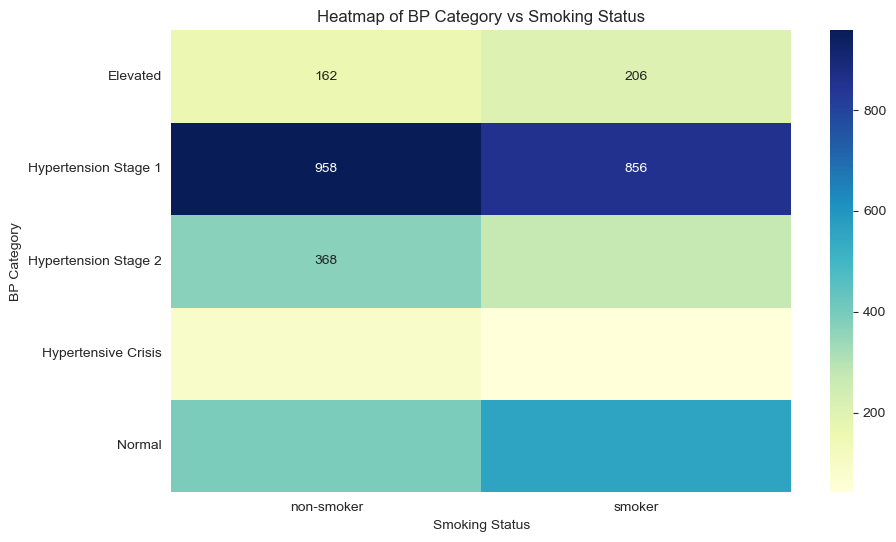

In [44]:
# Visualize BP categories using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df3, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of BP Category vs Smoking Status');


### 4. Cholesterol levels

In [31]:
df['Cholesterol Level'] = pd.cut(df.Cholesterol, bins=[0, 200, 240, float('inf')], labels=['desirable', 'at risk', 'very high'])
df.tail(3)

,Age,Gender,Smoking Status,Heart Rate,Blood Pressure,Cigs Per Day,Cholesterol,Age Group,Systolic,Diastolic,BP Category,Cholesterol Level
3897,56,male,smoker,70,125/79,60.0,246.0,51-60,125.0,79.0,Elevated,very high
3898,50,male,smoker,85,134/95,60.0,340.0,41-50,134.0,95.0,Hypertension Stage 1,very high
3899,40,male,smoker,98,132/86,70.0,210.0,31-40,132.0,86.0,Hypertension Stage 1,at risk


In [32]:
df4 = df.groupby('Smoking Status')['Cholesterol Level'].value_counts().reset_index(name='Total')
df4 =df4.pivot(index='Cholesterol Level', columns='Smoking Status', values='Total')
df4

Smoking Status,non-smoker,smoker
Cholesterol Level,,
desirable,380,444
at risk,706,694
very high,879,790


In [33]:
# Extract data for the pie charts
labels = df4.index.to_list()
sizes1 = df4['smoker'].value_counts().index

sizes2 = df4['non-smoker'].value_counts().values

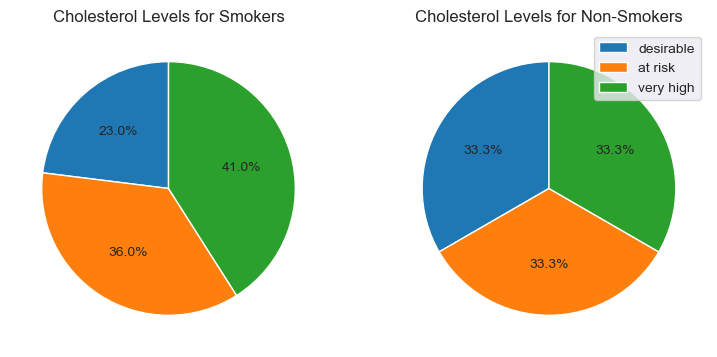

In [34]:
# Plot pie chart 
#plt.subplot(row, column, plot number)
plt.figure(figsize =(9,5))
plt.subplot(1,2,1)
plt.pie(x=sizes1, labels=None, autopct='%1.1f%%', startangle=90)
plt.title('Cholesterol Levels for Smokers')


plt.subplot(1,2,2)
plt.pie(x=sizes2, labels=None, autopct='%1.1f%%', startangle=90)
plt.title('Cholesterol Levels for Non-Smokers')
plt.legend(labels = labels, loc = 'upper right');



### 5. Categorizing cigarette consumption

In [35]:
bins = [0, 10, 20, 30, float('inf')]  
labels = ['Light smoker', 'Moderate smoker', 'Heavy smoker', 'Very heavy smoker']

# Create a new column to store the categories
df['Smoking Category'] = pd.cut(df['Cigs Per Day'], bins=bins, labels=labels, right=False)
df.sample(3)

,Age,Gender,Smoking Status,Heart Rate,Blood Pressure,Cigs Per Day,Cholesterol,Age Group,Systolic,Diastolic,BP Category,Cholesterol Level,Smoking Category
2947,60,male,smoker,65,127.5/72.5,20.0,260.0,51-60,127.5,72.5,Elevated,very high,Heavy smoker
2968,40,female,smoker,75,112.5/62.5,20.0,242.0,31-40,112.5,62.5,Normal,very high,Heavy smoker
1672,40,male,non-smoker,60,127/79,0.0,234.0,31-40,127.0,79.0,Elevated,at risk,Light smoker


In [36]:
df5 = df.groupby('Gender')['Smoking Category'].value_counts().reset_index(name='Total')
df5 = df5.pivot(index='Smoking Category', columns='Gender', values='Total')
df5

Gender,female,male
Smoking Category,,
Light smoker,1550,862
Moderate smoker,201,159
Heavy smoker,270,478
Very heavy smoker,60,320


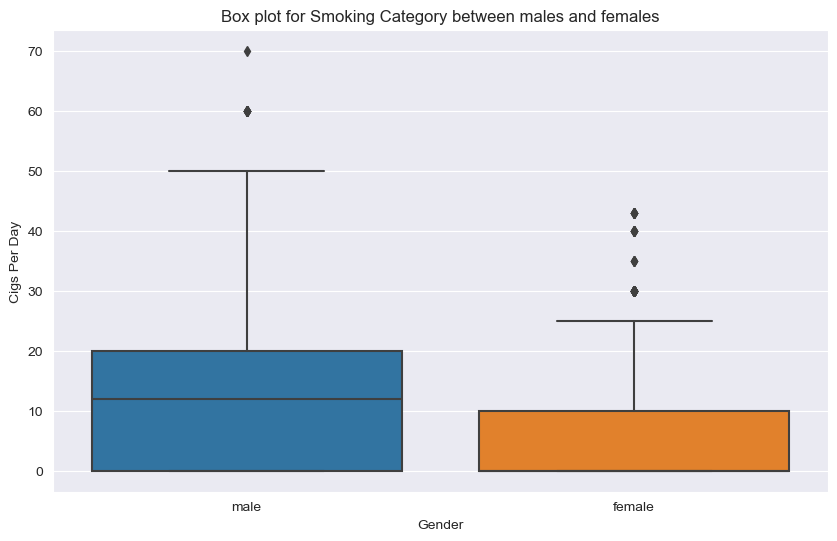

In [37]:
# Creating a boxplot for the smoking categories

plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Cigs Per Day', data=df)
plt.title('Box plot for Smoking Category between males and females')
plt.xlabel('Gender')
plt.ylabel('Cigs Per Day');


In [38]:
# Exploring the statistics between smokers and non-smokers

df6 = df.groupby('Smoking Status')['Heart Rate'].agg(['min', 'max', 'count', 'median', 'sum'])
df6

,min,max,count,median,sum
Smoking Status,,,,,
non-smoker,44,143,1968,75.0,147615
smoker,45,130,1932,75.0,147572


In [39]:
df.groupby('Age Group')['Cigs Per Day'].sum().reset_index(name='Total')

C:\Users\farou\AppData\Local\Temp\ipykernel_16840\1455101943.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Age Group')['Cigs Per Day'].sum().reset_index(name='Total')


,Age Group,Total
0,31-40,7816.0
1,41-50,16409.0
2,51-60,8803.0
3,61-70,2601.0


C:\Users\farou\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\farou\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


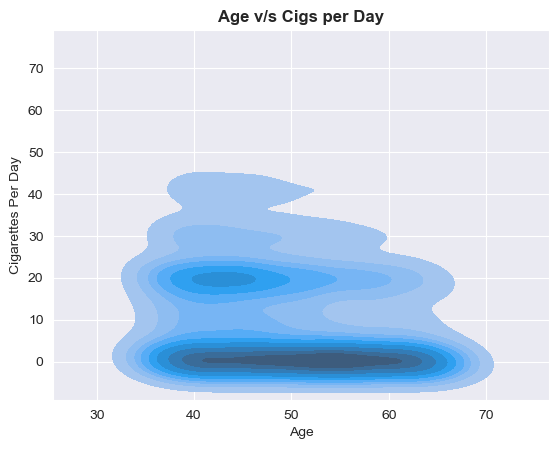

In [64]:
sns.kdeplot(data=df, x='Age', y='Cigs Per Day', fill=True)

plt.ylabel('Cigarettes Per Day')
plt.xlabel('Age')
plt.title('Age v/s Cigs per Day', fontweight='bold');

### 6. Categorizing Heart Rate

In [40]:
bins = [0, 60, 100, 120, float('inf')]

labels = ['Low', 'Normal', 'High', 'Very high']

df['Heart Rate Category'] = pd.cut(df['Heart Rate'], bins=bins, labels=labels)
df.sample(5)

,Age,Gender,Smoking Status,Heart Rate,Blood Pressure,Cigs Per Day,Cholesterol,Age Group,Systolic,Diastolic,BP Category,Cholesterol Level,Smoking Category,Heart Rate Category
256,61,female,non-smoker,85,141/80,0.0,257.0,61-70,141.0,80.0,Hypertension Stage 1,very high,Light smoker,Normal
310,55,female,non-smoker,69,141/84,0.0,226.0,51-60,141.0,84.0,Hypertension Stage 1,at risk,Light smoker,Normal
2061,47,female,smoker,72,133/86,2.0,232.0,41-50,133.0,86.0,Hypertension Stage 1,at risk,Light smoker,Normal
1774,51,female,non-smoker,75,131/87,0.0,226.0,51-60,131.0,87.0,Hypertension Stage 1,at risk,Light smoker,Normal
2863,59,male,smoker,70,138/80,20.0,163.0,51-60,138.0,80.0,Hypertension Stage 1,desirable,Heavy smoker,Normal


In [41]:
df7 = df.groupby('Age Group')['Heart Rate Category'].value_counts().reset_index(name='Total')
df7 = df6.pivot(index='Heart Rate Category', columns='Age Group', values='Total')
df7

C:\Users\farou\AppData\Local\Temp\ipykernel_16840\3609694076.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df6 = df.groupby('Age Group')['Heart Rate Category'].value_counts().reset_index(name='Total')


Age Group,31-40,41-50,51-60,61-70
Heart Rate Category,,,,
Low,71,145,129,67
Normal,602,1313,1029,451
High,14,31,27,13
Very high,3,2,1,2


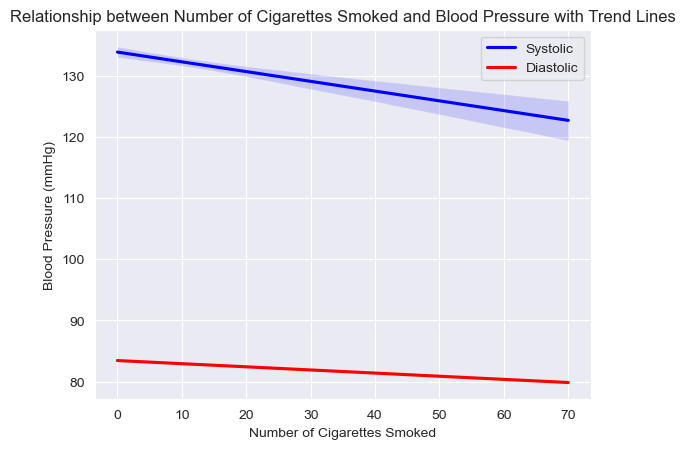

In [59]:
#Scatter and regression plot for Systolic Blood Pressure
#plt.gca().set(xlim=(0,70))
sns.regplot(x='Cigs Per Day', y='Systolic', data=df, color='blue', label='Systolic', scatter= False)
            #,scatter= False)

# Scatter and regression plot for Diastolic Blood Pressure
sns.regplot(x='Cigs Per Day', y='Diastolic', data=df, color='red', label='Diastolic', scatter= False, ci=None)
           #,fit_reg=False)

# Customize the plot
plt.title('Relationship between Number of Cigarettes Smoked and Blood Pressure with Trend Lines')
plt.xlabel('Number of Cigarettes Smoked')
plt.ylabel('Blood Pressure (mmHg)')
plt.legend();

In [45]:
df.sample(3)

,Age,Gender,Smoking Status,Heart Rate,Blood Pressure,Cigs Per Day,Cholesterol,Age Group,Systolic,Diastolic,BP Category,Cholesterol Level,Smoking Category,Heart Rate Category
1057,43,female,non-smoker,67,110.5/66,0.0,240.0,41-50,110.5,66.0,Normal,at risk,Light smoker,Normal
2289,38,male,smoker,77,116/70,7.0,229.0,31-40,116.0,70.0,Normal,at risk,Light smoker,Normal
1443,56,female,non-smoker,81,155/102,0.0,186.0,51-60,155.0,102.0,Hypertension Stage 2,desirable,Light smoker,Normal


## Inference & Clinical interpretation

In [43]:
#1. Males were predominately smokers than females.
#2. The aged, 50+ yrs age recorded less smoking activities comparatively to their younger counterpart.
#3. It can be seen that smoking causes increased in blood pressure but there are many other contributing factors as visible in non-smokers blood pressure values. 
#4. Cholesterol level of smokers are high, although non-smokers are at risk due to other factors.
#5. The figures displayed show that both smokers and non-smokers have similar values for lowest, highest, average Heart Rates. 
#6. Males consumed higher number of cigarettes per day than females.
#7. Comparatively, people who smoked less cigarettes have high blood pressure and the vice-versa is equally true.